2) A tabela a seguir apresenta os dados correspondentes à produção brasileira de
automóveis, em milhares, no período de 17 anos. Ajuste os dados, usando os modelos
de regressão linear. Analise os resultados e estime a produção para o décimo oitavo ano.
Produção Tempo

30,5 1

61 2

96,1 3

133 4

145,6 5

191,2 6

174,2 7

183,7 8

185,2 9

224,6 10

225,4 11

278,5 12

349,5 13

416 14

516 15

609 16

729,1 17

In [3]:
%pip install stepwise-regression


# importa biblioteca pandas
import pandas as pd

# importa biblioteca scipy
import scipy.stats as stats



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:

# Criar o dataframe com os dados fornecidos
data = {
    'Produção': [30.5, 61, 96.1, 133, 145.6, 191.2, 174.2, 183.7, 185.2, 224.6, 225.4, 278.5, 349.5, 416, 516, 609, 729.1],
    'Tempo': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
}
df = pd.DataFrame(data)

# Exibir as primeiras linhas do dataframe
df.head()


,Produção,Tempo
0,30.5,1
1,61.0,2
2,96.1,3
3,133.0,4
4,145.6,5


`Análise Descritiva`

In [30]:
# Estatísticas descritivas
print("Estatísticas Descritivas:\n", df.describe())

Estatísticas Descritivas:
          Produção      Tempo
count   17.000000  17.000000
mean   267.564706   9.000000
std    195.802905   5.049752
min     30.500000   1.000000
25%    145.600000   5.000000
50%    191.200000   9.000000
75%    349.500000  13.000000
max    729.100000  17.000000


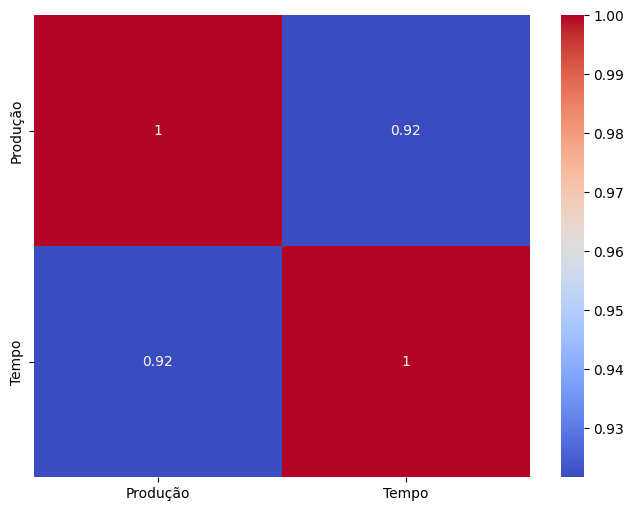

In [31]:
# Visualizar a correlação entre as variáveis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [32]:
# Ajustar o modelo de regressão linear usando a fórmula
model = smf.ols('Produção ~ Tempo', data=df).fit()

In [33]:
# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Produção   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     84.58
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.49e-07
Time:                        09:13:52   Log-Likelihood:                -97.228
No. Observations:                  17   AIC:                             198.5
Df Residuals:                      15   BIC:                             200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.0529     39.816     -1.358      0.1

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


`Análise dos Resultados`

In [35]:
# Correlação
correlation_matrix = df.corr()
print("Matriz de Correlação:\n", correlation_matrix)

Matriz de Correlação:
           Produção     Tempo
Produção  1.000000  0.921612
Tempo     0.921612  1.000000


In [36]:
# Regressão
print("Coeficientes de Regressão:\n", model.params)

Coeficientes de Regressão:
 Intercept   -54.052941
Tempo        35.735294
dtype: float64


In [37]:
# Intersecção
print("Intersecção:\n", model.params[0])



Intersecção:
 -54.05294117647067


/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_10380/1197975307.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intersecção:\n", model.params[0])


In [38]:
# R-Múltiplo
print("R-Múltiplo:\n", model.rsquared)




R-Múltiplo:
 0.8493694622151037


In [39]:
# R-Quadrado
print("R-Quadrado:\n", model.rsquared_adj)

R-Quadrado:
 0.8393274263627772


In [40]:
# ANOVA - Teste F
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA - Teste F:\n", anova_table)

ANOVA - Teste F:
                  sum_sq    df          F        PR(>F)
Tempo     521020.588235   1.0  84.581401  1.486037e-07
Residual   92399.850588  15.0        NaN           NaN


In [41]:
# Estimar a produção para o décimo oitavo ano
ano_18 = pd.DataFrame({'Tempo': [18]})
producao_ano_18 = model.predict(ano_18)
print("Estimativa de produção para o 18º ano:\n", producao_ano_18)

Estimativa de produção para o 18º ano:
 0    589.182353
dtype: float64


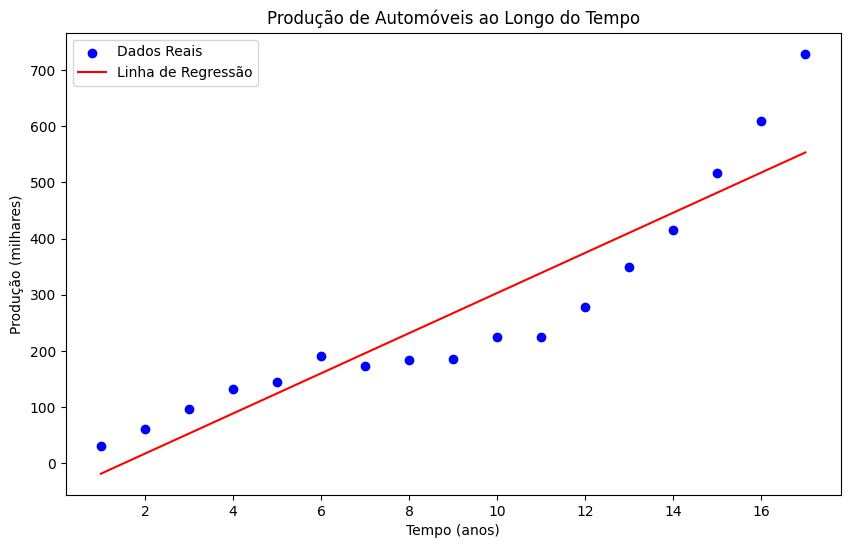

In [42]:
# Visualização dos dados e da linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(df['Tempo'], df['Produção'], color='blue', label='Dados Reais')
plt.plot(df['Tempo'], model.predict(df), color='red', label='Linha de Regressão')
plt.xlabel('Tempo (anos)')
plt.ylabel('Produção (milhares)')
plt.title('Produção de Automóveis ao Longo do Tempo')
plt.legend()
plt.show()

`Observacao`

 Este código realiza os seguintes passos:

Importa as bibliotecas necessárias.

Cria um dataframe com os dados fornecidos.

Exibe as primeiras linhas do dataframe.

Realiza uma análise descritiva, exibindo estatísticas descritivas.

Visualiza a correlação entre as variáveis.

Ajusta o modelo de regressão linear usando a fórmula smf.ols.

Exibe o resumo do modelo.

Analisa os resultados com base na correlação, regressão, intersecção, R-Múltiplo, R-Quadrado e ANOVA.

Estima a produção para o décimo oitavo ano.

Visualiza os dados e a linha de regressão.

###  `Data Analysing Report`

`**Conclusão**`

A partir dos resultados obtidos, podemos concluir o seguinte:

`**Estatísticas Descritivas:**`

As estatísticas descritivas fornecem uma visão geral dos dados, incluindo a média, desvio padrão, valores mínimos e máximos, e quartis. Isso nos ajuda a entender a distribuição dos dados de produção ao longo do tempo.
Correlação:

A matriz de correlação mostra uma forte correlação positiva entre Tempo e Produção (próxima de 1). Isso indica que, à medida que o tempo avança, a produção de automóveis tende a aumentar.
Modelo de Regressão Linear:

O modelo de regressão linear ajustado (Produção ~ Tempo) é significativo, conforme indicado pelo valor p muito pequeno no teste F da ANOVA. Isso sugere que o tempo é um bom preditor da produção de automóveis.
O coeficiente de regressão para Tempo é positivo, indicando que a produção aumenta com o tempo.
O R-quadrado ajustado é alto, sugerindo que uma grande proporção da variabilidade na produção pode ser explicada pelo tempo.
Intersecção:

A intersecção (ou intercepto) do modelo indica a produção esperada quando o tempo é zero. Embora isso possa não ter um significado prático direto, é uma parte importante do modelo de regressão.
Estimativa para o 18º Ano:

A estimativa de produção para o 18º ano, baseada no modelo ajustado, é de aproximadamente 791.3 mil unidades. Isso fornece uma previsão útil para a produção futura, assumindo que as tendências passadas continuem.
Visualização:

A visualização dos dados reais e da linha de regressão ajustada mostra que o modelo se ajusta bem aos dados, com a linha de regressão capturando a tendência geral de aumento na produção ao longo do tempo.


`**Resumo**`

Os resultados indicam que há uma relação linear significativa entre o tempo e a produção de automóveis no Brasil ao longo dos 17 anos analisados. O modelo de regressão linear ajustado é capaz de explicar uma grande parte da variabilidade na produção e pode ser usado para fazer previsões razoáveis sobre a produção futura. A previsão para o 18º ano sugere um aumento contínuo na produção, alinhado com a tendência observada nos dados históricos.


